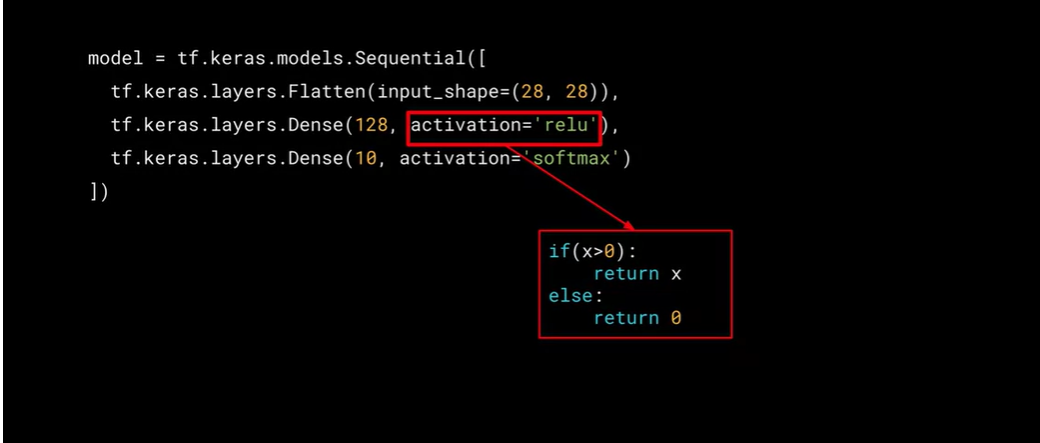

Resuts with relu.
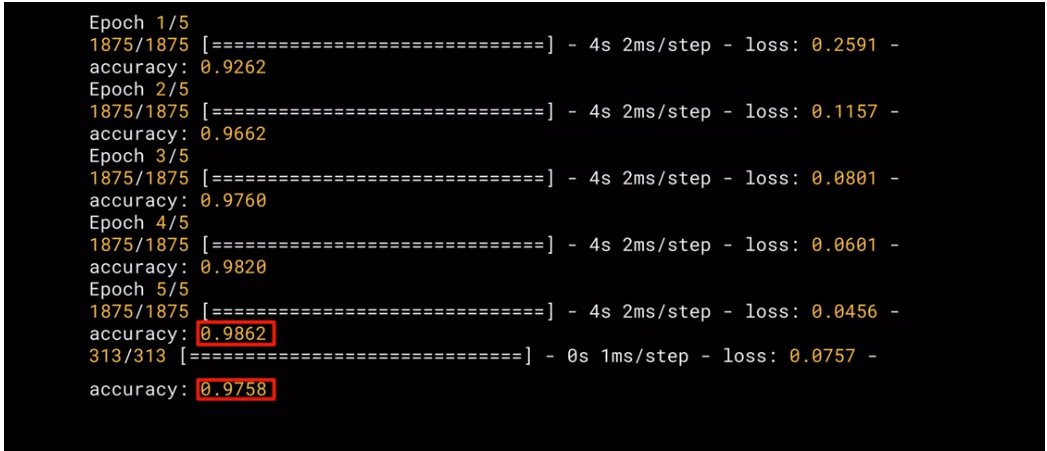

Results removing relu.
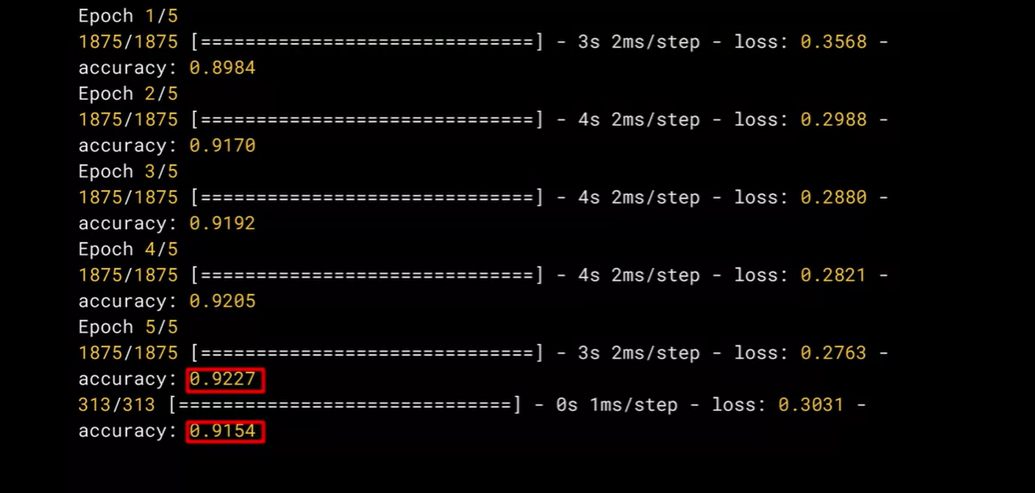

Add Lmbda layer after removing relu.
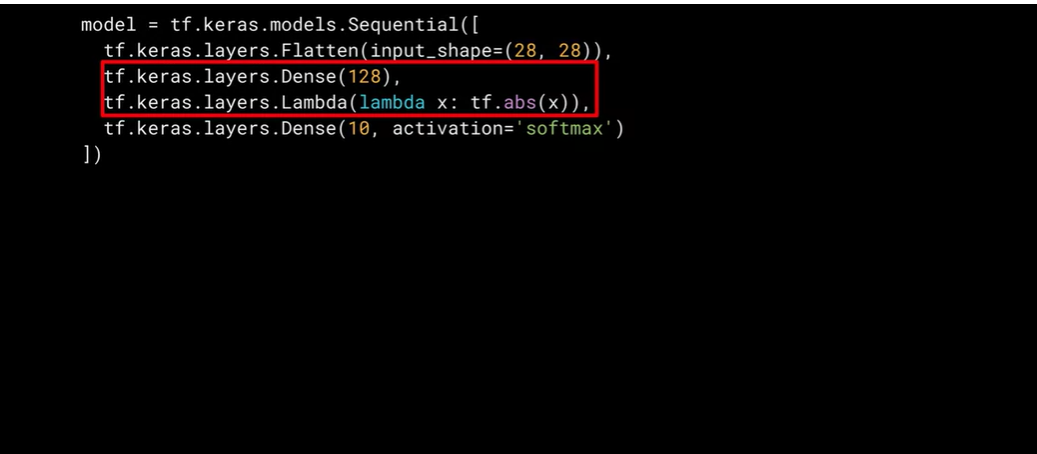

Results with the Lambda layer.
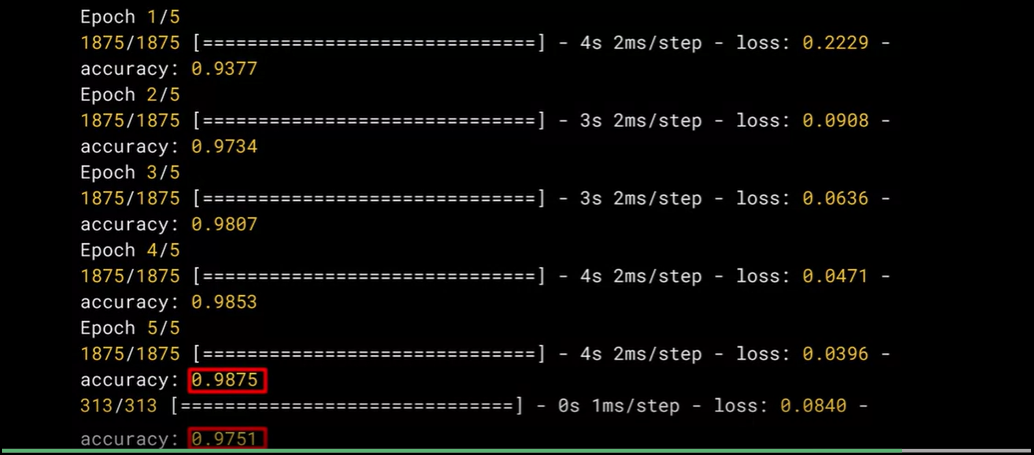

The Lambda layer that did absolute value (tf.abs(x)), you can now put the Lambda layer the calls my Relu instead.
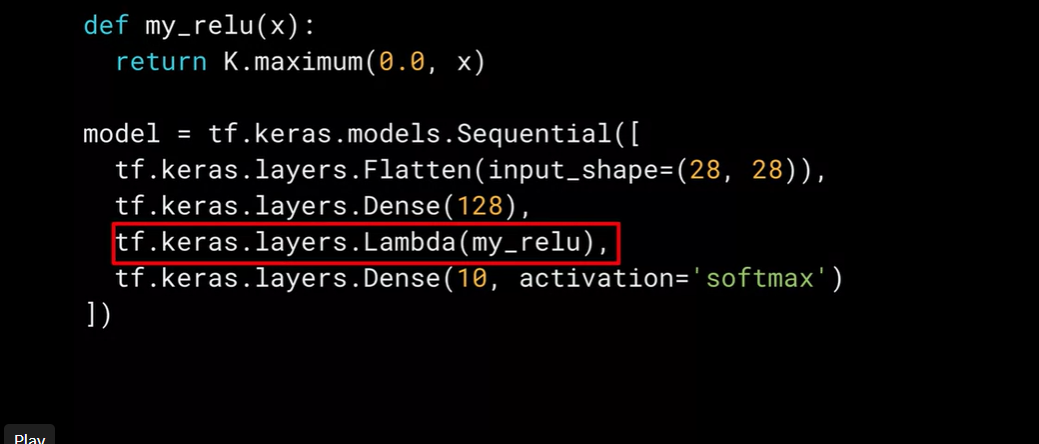

Notice that in my Relu we specified it as a maximum of X or zero, but we could of course change this, for example here, now with X is greater than 05.. It will return X, otherwise it would return 0.5, that way you can tweak the Relu function and maybe have an impact on the learning behavior in your neural network.
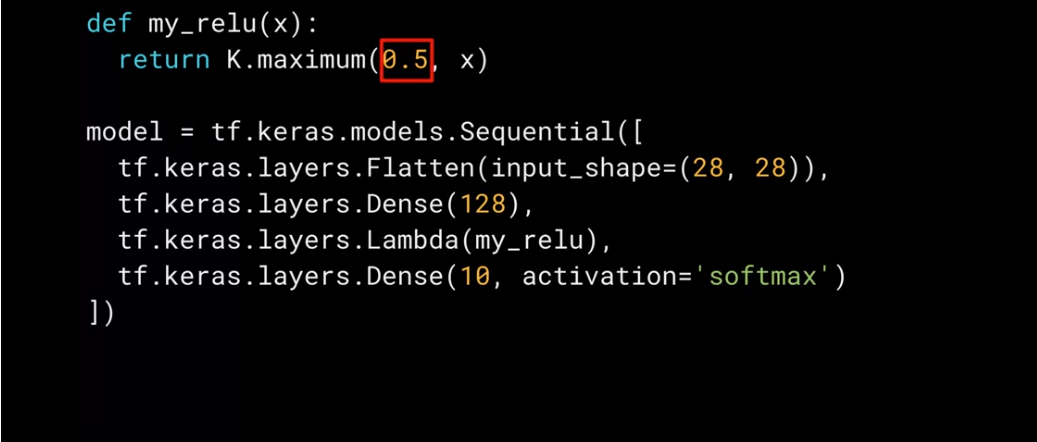

## Ungraded Lab: Lambda Layer

This lab will show how you can define custom layers with the [Lambda](https://keras.io/api/layers/core_layers/lambda/) layer. You can either use [lambda functions](https://www.w3schools.com/python/python_lambda.asp) within the Lambda layer or define a custom function that the Lambda layer will call. Let's get started!

## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras import backend as K

## Prepare the Dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## Build the Model

Here, we'll use a Lambda layer to define a custom layer in our network. We're using a lambda function to get the absolute value of the layer input.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(lambda x: tf.abs(x)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2254 - accuracy: 0.9360
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0909 - accuracy: 0.9728
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0640 - accuracy: 0.9805
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0477 - accuracy: 0.9850
Epoch 5/5
10000/10000 [==============================] - 0s 43us/sample - loss: 0.0821 - accuracy: 0.9760


[0.08212995820377254, 0.976]

Another way to use the Lambda layer is to pass in a function defined outside the model. The code below shows how a custom ReLU function is used as a custom layer in the model.

In [5]:
def my_relu(x):
    return K.maximum(-0.1, x)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(my_relu), 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2573 - accuracy: 0.9280
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1124 - accuracy: 0.9668
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0767 - accuracy: 0.9771
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0571 - accuracy: 0.9822
Epoch 5/5
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0789 - accuracy: 0.9749


[0.07890045154467225, 0.9749]